<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>INTRODUCTION TO DEEP LEARNING WITH KERAS</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Binary, Multi-class, Multi-label Classification & Callbacks)</span></div>

## Table of Contents
1. [Binary Classification](#section-1)
2. [Multi-class Classification](#section-2)
3. [Multi-label Classification](#section-3)
4. [Keras Callbacks](#section-4)
5. [Conclusion](#section-5)

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. BINARY CLASSIFICATION</span><br>

### 1.1 When to use Binary Classification?
Binary classification is used when we need to distinguish between exactly two classes. A classic example is separating blue circles from red circles based on their coordinates.

**The Dataset**
The dataset typically consists of coordinates (features) and labels (targets). In this example, we have 2D coordinates and a binary label (0 or 1).

| coordinates | labels |
| :--- | :---: |
| [0.242, 0.038] | 1 |
| [0.044, -0.057] | 1 |
| [-0.787, -0.076] | 0 |

### 1.2 Visualizing Data with Pairplots
Before building a model, it is essential to visualize the data to understand the separability of the classes. We can use the `seaborn` library for this.

**Original Code (from PDF):**


In [1]:
import seaborn as sns

# Plot a pairplot
sns.pairplot(circles, hue="target")

NameError: name 'circles' is not defined


**Enhanced Runnable Code:**
Below, we generate a synthetic dataset similar to the one in the slides and visualize it.



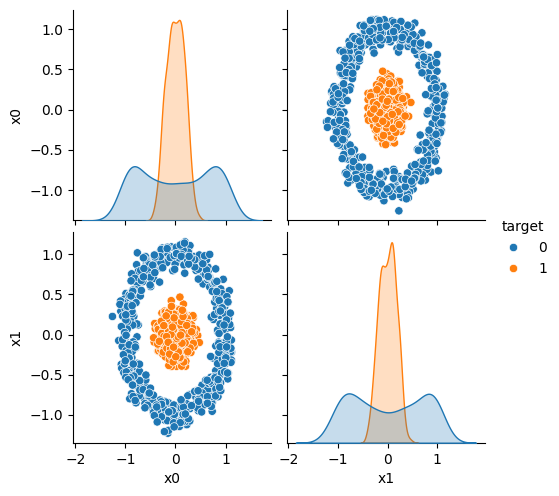

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data (circles)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# Create a DataFrame
circles = pd.DataFrame({'x0': X[:, 0], 'x1': X[:, 1], 'target': y})

# Plot a pairplot
sns.pairplot(circles, hue="target")
plt.show()


### 1.3 Neural Network Architecture
To solve this problem, we use a neural network.
1.  **Input Layer:** Receives the coordinates.
2.  **Hidden Layer:** Processes features (e.g., 4 neurons, `tanh` activation).
3.  **Output Layer:** Produces the final prediction.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> For binary classification, the output layer typically uses the <b>Sigmoid</b> activation function. It transforms the neuron output into a probability between 0 and 1. </div>

**The Sigmoid Function Logic:**
$$ \text{neuron output (3)} \rightarrow \text{sigmoid} \rightarrow \text{transformed output (0.95)} \rightarrow \text{rounded output (1)} $$

### 1.4 Building the Model in Keras
We will use the `Sequential` API from Keras to build the model layer by layer.

**Original Code (from PDF):**


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a sequential model
model = Sequential()

# Add input and hidden layer
model.add(Dense(4, input_shape=(2,), activation='tanh'))

# Add output layer, use sigmoid
model.add(Dense(1, activation='sigmoid'))

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



**Enhanced Runnable Code:**


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a sequential model
model = Sequential()

# Add input and hidden layer
# input_shape=(2,) corresponds to the x and y coordinates
model.add(Dense(4, input_shape=(2,), activation='tanh'))

# Add output layer, use sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


### 1.5 Compiling, Training, and Predicting
Once the model is built, we must compile it with an optimizer and a loss function. For binary classification, the standard loss function is `binary_crossentropy`.

**Original Code (from PDF):**


In [5]:
# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy')

# Train model
# Note: PDF uses .train(), but standard Keras API is .fit()
model.train(coordinates, labels, epochs=20)

# Predict with trained model
preds = model.predict(coordinates)

AttributeError: 'Sequential' object has no attribute 'train'


**Enhanced Runnable Code:**


In [6]:
# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
# We use the 'circles' data generated earlier
# X contains coordinates, y contains labels
model.fit(X, y, epochs=20, verbose=1)

# Predict with trained model
preds = model.predict(X)

# Display first 5 predictions
print("First 5 predictions:\n", preds[:5])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5230 - loss: 0.7445   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 0.7365
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 0.7297 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 0.7237 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.7184 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.7136 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 0.7096 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6190 - loss: 0.7057
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6260 - loss: 0.7019 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6360 - loss: 0.6986 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.6956 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. MULTI-CLASS CLASSIFICATION</span><br>

### 2.1 The Concept
Multi-class classification involves distinguishing between **more than two** classes.
*   **Analogy:** Throwing darts where different regions correspond to different competitors (Steve, Susan, Michael, Kate).
*   **Dataset:** Features (`xCoord`, `yCoord`) and a categorical target (`competitor`).

**Example Dataset:**

| xCoord | yCoord | competitor |
| :--- | :--- | :--- |
| -0.037673 | 0.057402 | Steve |
| -0.331021 | -0.585035 | Susan |
| -0.123567 | 0.839730 | Susan |
| -0.086160 | 0.959787 | Michael |
| -0.902632 | 0.078753 | Michael |

### 2.2 Architecture for Multi-Class
The architecture changes slightly from binary classification:
1.  **Input/Hidden Layers:** Similar structure (e.g., 128 -> 64 -> 32 neurons).
2.  **Output Layer:** The number of neurons **must equal the number of classes**.
3.  **Activation:** We use **Softmax**.

**Softmax Output Example:**
Softmax ensures all output probabilities sum to 1.
*   Michael: 0.6
*   Susan: 0.1
*   Kate: 0.2
*   Steve: 0.1
*   **Total:** 1.0

### 2.3 Building the Multi-Class Model

**Original Code (from PDF):**


In [7]:
# Instantiate a sequential model
# ...
# Add an input and hidden layer
# ...
# Add more hidden layers
# ...
# Add your output layer
model.add(Dense(4, activation='softmax'))


**Enhanced Runnable Code:**


In [8]:
# Define a multi-class model
mc_model = Sequential()

# Input layer and first hidden layer
mc_model.add(Dense(128, input_shape=(2,), activation='relu'))

# Additional hidden layers
mc_model.add(Dense(64, activation='relu'))
mc_model.add(Dense(32, activation='relu'))

# Output layer: 4 neurons (for 4 competitors), softmax activation
mc_model.add(Dense(4, activation='softmax'))

mc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)


### 2.4 Categorical Cross-Entropy
For multi-class problems, the loss function is `categorical_crossentropy`.

**Original Code (from PDF):**


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy')


### 2.5 Preparing the Dataset (One-Hot Encoding)
Neural networks cannot understand text labels like "Steve" or "Susan". We must convert them into numbers.
1.  **Label Encoding:** Assign a number to each category (0, 1, 2, 3).
2.  **One-Hot Encoding:** Create a binary vector for each category.

**One-Hot Encoding Table:**

| Food Name | Categorical # | Calories | $\rightarrow$ | Apple | Chicken | Broccoli | Calories |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Apple | 1 | 95 | | 1 | 0 | 0 | 95 |
| Chicken | 2 | 231 | | 0 | 1 | 0 | 231 |
| Broccoli | 3 | 50 | | 0 | 0 | 1 | 50 |

**Original Code (from PDF):**


In [ ]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('data.csv')

# Turn response variable into labeled codes
df.response = pd.Categorical(df.response)
df.response = df.response.cat.codes

# Turn response variable into one-hot response vector
y = to_categorical(df.response)


**Enhanced Runnable Code (with dummy data):**


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Create dummy data
data = {
    'xCoord': np.random.rand(5),
    'yCoord': np.random.rand(5),
    'competitor': ['Steve', 'Susan', 'Susan', 'Michael', 'Michael']
}
df = pd.DataFrame(data)

print("Original Data:\n", df)

# Turn response variable into labeled codes
df['competitor_code'] = pd.Categorical(df['competitor']).codes

print("\nLabeled Codes:\n", df[['competitor', 'competitor_code']])

# Turn response variable into one-hot response vector
y_one_hot = to_categorical(df['competitor_code'])

print("\nOne-Hot Encoded Target:\n", y_one_hot)


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. MULTI-LABEL CLASSIFICATION</span><br>

### 3.1 The Concept
In multi-label classification, a single instance can belong to **multiple classes** simultaneously.
*   **Example:** A TV show like *Game of Thrones* can be tagged as "Action", "Adventure", AND "Drama".
*   **Irrigation Machine Example:** A sensor reading might indicate multiple parcels of land need water simultaneously.

### 3.2 Architecture Differences
*   **Multi-Class:** Uses `softmax` (probabilities sum to 1, classes are mutually exclusive).
*   **Multi-Label:** Uses `sigmoid` on the output layer. Each neuron outputs a probability between 0 and 1 independently of the others.

**Comparison:**

| Feature | Multi-Class | Multi-Label |
| :--- | :--- | :--- |
| **Example** | Sun OR Moon OR Cloud | Sun AND Cloud |
| **Labels** | [0 0 1] (Only one active) | [1 0 1] (Multiple active) |
| **Activation** | Softmax | Sigmoid |
| **Loss** | Categorical Cross-entropy | Binary Cross-entropy |

### 3.3 Building the Multi-Label Model

**Original Code (from PDF):**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate model
model = Sequential()

# Add input and hidden layers
model.add(Dense(2, input_shape=(1,)))

# Add an output layer for the 3 classes and sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile the model with binary crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')


**Enhanced Runnable Code:**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate dummy multi-label data
# 100 samples, 10 features
X_train = np.random.random((100, 10))
# 100 samples, 3 possible labels (0 or 1 for each)
y_train = np.random.randint(2, size=(100, 3))

# Instantiate model
ml_model = Sequential()

# Add input and hidden layers
ml_model.add(Dense(16, input_shape=(10,), activation='relu'))

# Add an output layer for the 3 classes and sigmoid activation
# Sigmoid allows each output node to independently be close to 0 or 1
ml_model.add(Dense(3, activation='sigmoid'))

# Compile the model with binary crossentropy
ml_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# validation_split creates a validation set automatically
history = ml_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. KERAS CALLBACKS</span><br>

### 4.1 What is a Callback?
A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

### 4.2 The History Callback
The `fit()` method returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training.

**Original Code (from PDF):**


In [ ]:
# Training a model and saving its history
history = model.fit(X_train, y_train, epochs=100, metrics=['accuracy'])

print(history.history['loss'])
print(history.history['accuracy'])


**Plotting History:**
We can visualize the training progress using Matplotlib.

**Original Code (from PDF):**


In [ ]:
import matplotlib.pyplot as plt

# Plot train vs test accuracy per epoch
plt.figure()

# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


### 4.3 Early Stopping
Early stopping is a technique to prevent overfitting. It stops training when a monitored metric (like validation loss) has stopped improving.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> The `patience` parameter determines how many epochs to wait after the metric stops improving before actually stopping the training. </div>

**Original Code (from PDF):**


In [ ]:
# Import early stopping from keras callbacks
from tensorflow.keras.callbacks import EarlyStopping

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train your model with the callback
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])


### 4.4 Model Checkpoint
`ModelCheckpoint` saves the model at some interval, so the model can be loaded later to continue training from the state saved. Setting `save_best_only=True` ensures you only save the model when it performs better than previous epochs.

**Original Code (from PDF):**


In [ ]:
# Import model checkpoint from keras callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True)

# Train your model with the callback
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[model_save])


**Enhanced Runnable Code (Combining Callbacks):**


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 2. Define Model Checkpoint
# We use a temporary filename for the example
checkpoint = ModelCheckpoint('best_run_model.keras', save_best_only=True, verbose=1)

# 3. Train with both callbacks
# Using the multi-label model and data from the previous section
history_cb = ml_model.fit(
    X_train, y_train, 
    epochs=50, 
    validation_split=0.2, 
    callbacks=[early_stop, checkpoint],
    verbose=0 # Silencing output for brevity in notebook
)

print("Training finished.")
print(f"Stopped at epoch: {len(history_cb.history['loss'])}")


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. CONCLUSION</span><br>

In this notebook, we have covered the fundamental architectures and strategies for classification using Keras:

1.  **Binary Classification:** Used for 2 classes.
    *   **Activation:** Sigmoid.
    *   **Loss:** Binary Cross-entropy.
2.  **Multi-Class Classification:** Used for >2 mutually exclusive classes.
    *   **Activation:** Softmax.
    *   **Loss:** Categorical Cross-entropy.
    *   **Data Prep:** Requires One-Hot Encoding.
3.  **Multi-Label Classification:** Used when an item can belong to multiple classes.
    *   **Activation:** Sigmoid (per node).
    *   **Loss:** Binary Cross-entropy.
4.  **Callbacks:**
    *   **History:** For plotting metrics.
    *   **EarlyStopping:** To prevent overfitting and save time.
    *   **ModelCheckpoint:** To save the best version of the model during training.

**Next Steps:**
*   Experiment with different numbers of hidden layers and neurons.
*   Try applying these architectures to real-world datasets (e.g., MNIST for multi-class).
*   Explore other callbacks like `ReduceLROnPlateau` to adjust learning rates dynamically.
